In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.io import loadmat
from sklearn.model_selection import  StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,confusion_matrix

### linkage

In [ ]:
X =  [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
Z = linkage(X, 'ward')
print(Z)

#     [2, 8, 0, 4, 1, 9, 9, 0]
#idx   0  1  2  3  4  5  6  7

# 1: c5 - c6 (9 & 9) [2,8,0,4,1,0  (9,9)] 
#                      0 1 2 3 4 7    8
# 2: c2 - c7 (0 & 0) [2,8,4,1, (9,9)  (0,0)]
#                      0 1 3 4    8       9
# 3 :c0 - c4 (2 & 1) [8,4, (9,9)  (0,0),  (2,1)]
#                      1 3     8       9     10
    
# comp ward for c1 c8 -> 1.15470054
# sqrt(((1+1)/3) + ((1+1)/3) - ((1/3) * 0)) -> 1.15470054

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [ ]:
X =  [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
Z = linkage(X, 'single')
print(Z)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

### Agglomerative Clustering

In [ ]:
# ex 441
X = pd.DataFrame([[1,4,1],[1,2,3],[0,0,1],[-1,4,0],[1,0,-2],[-1,-1,1],[0,-4,0],[1,0,-3]])

agg = AgglomerativeClustering(n_clusters=5,affinity='manhattan',linkage='single')
labels = agg.fit_predict(X)
print('cluster label:',labels)

In [ ]:
Z = linkage(X, 'single')
print(Z)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

### Agglomerative Clustering on blobs - sample 1 from web 

In [ ]:

dataset = make_blobs(n_samples=200,
                    n_features=2,
                    centers=4,
                    cluster_std=1.6,
                    random_state=50)



In [ ]:
points = dataset[0]

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
dendogram = sch.dendrogram(sch.linkage(points,method='ward'))

In [ ]:
plt.scatter(dataset[0][:,0],dataset[0][:,1])

In [ ]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [ ]:
y_hc = hc.fit_predict(points)

In [ ]:
plt.scatter(points[y_hc == 0,0],points[y_hc == 0,1],s = 100,c = 'cyan')
plt.scatter(points[y_hc == 1,0],points[y_hc == 1,1],s = 100,c = 'yellow')
plt.scatter(points[y_hc == 2,0],points[y_hc == 2,1],s = 100,c = 'red')
plt.scatter(points[y_hc == 3,0],points[y_hc == 3,1],s = 100,c = 'green')



### Agglomerative Clustering on blobs - sample 2  - compare to KMeans accuracy pg. 396

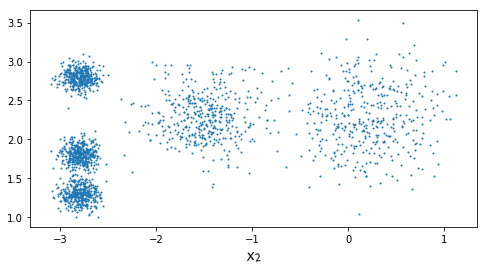

In [2]:
from sklearn.datasets import make_blobs
blob_centers = np.array([[0.2,2.3],
                        [-1.5,2.3],
                        [-2.8,1.8],
                        [-2.8,2.8],
                        [-2.8,1.3]])
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])

X,y = make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std)

def plot_clsters(X,y=None):
    plt.scatter(X[:,0],X[:,1],c=y,s=1)
    plt.xlabel("$x_1$",fontsize=14)
    plt.xlabel("$x_2$",fontsize=14,rotation=8)

plt.figure(figsize=(8,4))
plot_clsters(X)
plt.show()

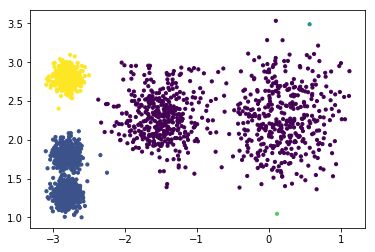

In [3]:
#check ward 
model = AgglomerativeClustering(n_clusters=5,affinity='manhattan',linkage='single')
y_pred = model.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred,s=10,cmap='viridis')

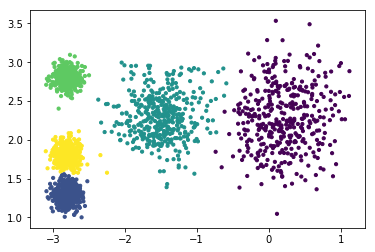

In [4]:
model = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_pred = model.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred,s=10,cmap='viridis')

### Agglomerative Clustering on MNIST

In [ ]:
mnist_path = '../mnist-original.mat'

mnist = loadmat(mnist_path)
X = mnist['data'].T
y = mnist['label'][0]
#display(X.shape , y.shape)

# v = X.copy()
# X[v>=128] = 0
# X[v<128] = 255


# Scale all X values
#scaler = StandardScaler()
#X_scaled  = scaler.fit_transform(X)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.05,train_size=0.05, random_state=0)
train_index, test_index = next(sss.split(X=X, y=y))   

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


print('X_train shape ', X_train.shape,'X_test shape' , X_test.shape)
print('Y_train shape ', y_train.shape,'Y_test shape' , y_test.shape)

In [ ]:
# compare methods
agg = AgglomerativeClustering(n_clusters=10,affinity='manhattan',linkage='single')
y_pred = agg.fit_predict(X_train)
print(np.unique(y_pred))
print(accuracy_score(y_train,y_pred))


agg = AgglomerativeClustering(n_clusters=10,affinity='l2',linkage='single')
y_pred = agg.fit_predict(X_train)
print(np.unique(y_pred))
print(accuracy_score(y_train,y_pred))


agg = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='ward')
y_pred = agg.fit_predict(X_train)
print(np.unique(y_pred))
print(accuracy_score(y_train,y_pred))